In [38]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import xgboost

from functions import make_dataset

from functions import make_portfolio

from sklearn.utils import shuffle

import time

import pickle

In [ ]:
"""
want the tickers and dates of stocks that are screened out by the rf
500 portfilio from eval size of 20, and see the number of unique dates aswell
"""

In [39]:
Date1 = np.load("training_sets/Date1.npy", allow_pickle = True)
Date2 = np.load("training_sets/Date2.npy", allow_pickle = True)
Date3 = np.load("training_sets/Date3.npy", allow_pickle = True)

In [40]:
Dates = np.append(Date1, np.append(Date2, Date3))

In [41]:
def make_dataset_eval_with_extra_return_40_term_from_periods(df, training_period, prediction_period, cols, pred_col, return_col):
    
    
    X_train = shuffle(df.loc[training_period, np.append(cols, pred_col)])
    X_train = X_train.replace([np.inf, -np.inf], np.NaN)
    X_train = X_train.dropna(axis = 0)

    Y_train = X_train.pop(pred_col)
    
    
    
    X_test = shuffle(df.loc[prediction_period, np.append(cols, return_col)])
    X_test = X_test.replace([np.inf, -np.inf], np.NaN)
    X_test = X_test.dropna(axis = 0)
    
    Y_return_40 = X_test.pop(return_col)
    
    return X_train, X_test, Y_train, Y_return_40

In [42]:
def return_40_metric(pred, labels):
    

    return labels[np.argsort(pred)[:750]]

In [43]:
class my_callback(xgboost.callback.TrainingCallback):
    
    def __init__(self, xgeval, Y_eval_return_40, results_eval):
        self.eval_mine = xgeval
        self.eval_return_40 = Y_eval_return_40
        self.results_eval_mine = results_eval
        
        
    def after_iteration(self, model, epoch, evals_log):
        
        
        if epoch % 10 == 0 or epoch == 69:
            

            self.results_eval_mine.append(return_40_metric(model.predict(self.eval_mine), self.eval_return_40))    
        

            
        return False

In [44]:
params1 = {
  'colsample_bynode': 0.6,
    'colsample_bytree' : 0.6,
    'colsample_bylevel' : 0.5,
  'learning_rate': 0.3,
  'max_depth': 3,
  'num_parallel_tree': 100,
  'objective': 'binary:logistic',
  'subsample': 0.9,
  'tree_method': 'gpu_hist',
    "verbosity" : 0,
    "lambda" : 1,
    "alpha" : 0
}

In [45]:
with open("ColSearch2/where_highest_return_binary_cols_20", "rb") as f:
    highest_return_binary_20 = pickle.load(f)

In [9]:
features1 = pd.read_pickle("training_sets/features1")

In [10]:
Dates[400:650]

'2014-04-28'

In [21]:
test = features1.reset_index().set_index(["Ticker", "Date"]).loc["A"].loc[Dates[:650]]

In [23]:
test.to_csv("test.csv")

In [28]:
Dates[360 + 200]

'2013-12-16'

In [ ]:
prediction_date - 120 - 40 + 1 

In [31]:
Dates[519]

'2013-10-17'

In [30]:
360 + 160 -1

519

In [30]:
prediction_dates = np.linspace(650, len(Dates) - 80, 20).astype(int)

In [31]:
prediction_dates

array([ 650,  734,  819,  903,  988, 1072, 1157, 1242, 1326, 1411, 1495,
       1580, 1664, 1749, 1834, 1918, 2003, 2087, 2172, 2257])

In [32]:
[prediction_dates[i+1] - prediction_dates[i] for i in range(19)]

[84, 85, 84, 85, 84, 85, 85, 84, 85, 84, 85, 84, 85, 85, 84, 85, 84, 85, 85]

In [32]:
prediction_dates = (prediction_dates + 21)[:-1]

In [33]:
prediction_dates = np.append(prediction_dates, prediction_dates + 21)

In [34]:
prediction_dates = np.sort(prediction_dates)

In [35]:
prediction_dates

array([ 671,  692,  755,  776,  840,  861,  924,  945, 1009, 1030, 1093,
       1114, 1178, 1199, 1263, 1284, 1347, 1368, 1432, 1453, 1516, 1537,
       1601, 1622, 1685, 1706, 1770, 1791, 1855, 1876, 1939, 1960, 2024,
       2045, 2108, 2129, 2193, 2214])

In [38]:
len(prediction_dates)

38

In [33]:
prediction_dates = (prediction_dates + 63)[:-1]

In [35]:
prediction_dates

array([ 713,  797,  882,  966, 1051, 1135, 1220, 1305, 1389, 1474, 1558,
       1643, 1727, 1812, 1897, 1981, 2066, 2150, 2235])

In [34]:
len(prediction_dates)

19

In [46]:
prediction_dates = np.linspace(520, 630, 7).astype(int)

In [47]:
prediction_dates

array([520, 538, 556, 575, 593, 611, 630])

In [13]:
#prediction_dates = (prediction_dates + 40)[:-1]

In [14]:
#prediction_dates = (prediction_dates -20)

In [48]:
count = 0

results_binary = []


start_time = time.perf_counter()

#while True:
    
#for cols_trials in [highest_corr_binary_20, highest_corr_binary_100, lowest_corr_binary_20, lowest_corr_binary_100, not_corr_binary_20, not_corr_binary_100, highest_return_binary_20, highest_return_binary_100]:
for cols_trials in [highest_return_binary_20]:  
    count +=1
    print(str(count))

    if time.perf_counter() - start_time > 3600:
        print("sleeping")
        time.sleep(600)
        start_time = time.perf_counter()

        
        
    unique_cols = np.array([])
    for i in cols_trials:
        unique_cols = np.append(unique_cols, i)

    unique_cols = np.unique(unique_cols)
    
    unique_cols = np.append(unique_cols, ["Class_binary_40_20", "return_40"])
    #unique_cols = np.append(unique_cols, ["return_40"])
    
    
    results1 = []
    
    #results1_reg = []
    #results1_pruned = []
    
    
    for prediction_date in prediction_dates:
        
        
        #results2_reg = []
        #results2_pruned = []
        
        results2 = []
        
        start_time_df_create = time.perf_counter()
        
        
        training_period = Dates[prediction_date - 120 - 40 + 1: prediction_date - 40 +1]

        prediction_period = Dates[prediction_date :prediction_date + 20 + 1]
        
         
        if len(np.intersect1d(np.append(training_period, prediction_period), Date1)):
        
            if "features1" not in locals():

                features1 = pd.read_pickle("training_sets/features1")   
                
                print("imported features1")

            Date1_intersect = np.intersect1d(np.append(training_period, prediction_period), Date1)

            X_train_master = features1.loc[Date1_intersect, unique_cols]
            

        else:

            if "features1" in locals():
                del features1
                
                print("deleted features1")


        if len(np.intersect1d(np.append(training_period, prediction_period), Date2)):
            
            if "features2" not in locals():

                features2 = pd.read_pickle("training_sets/features2")
                
                print("imported features2")
                
            Date2_intersect = np.intersect1d(np.append(training_period, prediction_period), Date2)
                
            if "X_train_master" in locals():
                
                X_train_master = X_train_master.append(features2.loc[Date2_intersect, unique_cols])
                
            else:
                
                X_train_master = features2.loc[Date2_intersect, unique_cols]
                
        else:

            if "features2" in locals():
                del features2
                
                print("deleted features2")


        if len(np.intersect1d(np.append(training_period, prediction_period), Date3)):

            if "features3" not in locals():

                features3 = pd.read_pickle("training_sets/features3")
                
                print("imported features3")
                
                
            Date3_intersect = np.intersect1d(np.append(training_period, prediction_period), Date3)
                
            if "X_train_master" in locals():
                
                X_train_master = X_train_master.append(features3.loc[Date3_intersect, unique_cols])
                
            else:
                
                X_train_master = features3.loc[Date3_intersect, unique_cols]

        else:

            if "features3" in locals():
                del features3
                
                print("deleted features3")
                
                
        print("df_create_time: "+ str(time.perf_counter() - start_time_df_create))
        
        start_time_cols = time.perf_counter()
        
        for col_indx, cols in enumerate(cols_trials):

        
            results3 = []
            

            X_train, X_test, Y_train, Y_return_40 = make_dataset_eval_with_extra_return_40_term_from_periods(X_train_master, training_period, prediction_period, cols, "Class_binary_40_20", "return_40")

            train_weights = Y_train.map({0:19, 1:1})

            xgtrain = xgboost.DMatrix(X_train.values, Y_train.values, feature_names = cols, weight = train_weights)

            xgtest = xgboost.DMatrix(X_test.values, feature_names = cols)

            data = []

            mycallback = my_callback(xgtest, Y_return_40, data)

            bst = xgboost.train(params1, xgtrain, num_boost_round = 70, verbose_eval = False, callbacks = [mycallback])
            
            
            results3.append(prediction_date)
            results3.append(cols)
            results3.append(data)

            results2.append(results3)
            

            
        #results1_reg.append(results2_reg)
        results1.append(results2)
        
        print("10 cols time: " + str(time.perf_counter() - start_time_cols))
            
            
        del X_train_master
        
    #results_reg.append(results1_reg)
    results_binary.append(results1)
    
    #with open("ColSearch3/results_regVsPruned_reg.pkl", "wb") as f:
    #    pickle.dump(results_reg, f)
        
    with open("CreatingSecondDataset/binary_highest_return_20_4", "wb") as f:
        pickle.dump(results_binary, f)
        


1
df_create_time: 0.1727355999998963
10 cols time: 131.05371969999987
df_create_time: 0.1755111999998462
10 cols time: 130.97712479999996
df_create_time: 0.1541657000000214
10 cols time: 131.1884473
df_create_time: 0.17224529999998595
10 cols time: 131.34630199999992
df_create_time: 0.1611101000000872
10 cols time: 132.67847949999987
df_create_time: 0.16815870000004907
10 cols time: 132.21981430000005
df_create_time: 0.1725679000001037
10 cols time: 132.52769520000015


In [8]:
with open("CreatingSecondDataset/binary_highest_return_20", "rb") as f:
    results_binary_test = pickle.load(f)

In [4]:
with open("CreatingSecondDataset/binary_highest_return_20_3", "rb") as f:
    results_binary = pickle.load(f)

In [9]:
start_time = time.perf_counter()
results_binary[0][0][0]
print(time.perf_counter() - start_time)

5.9399999997822306e-05


In [48]:
np.shape(results_binary)

(1, 19, 10, 3)

In [49]:
features3 = pd.read_pickle("training_sets/features3")

In [12]:
features2 = pd.read_pickle("training_sets/features2")
features3 = features2.append(features3)

In [13]:
del features2

In [14]:
del results_binary_test

In [15]:
features1 = pd.read_pickle("training_sets/features1")
features3 = features1.append(features3)
del features1

In [18]:
len(results_binary[0][0][0][2])

8

In [43]:
thing2 = []
for i in range(8):
    thing2.append(np.array([]))

#for i in range(20):
    
for i in range(19):
    for j in range(10):

        
        for k in range(8):
            
            thing2[k] = np.append(thing2[k], features3.loc[results_binary[0][i][j][2][k].index, "return_40"].values)
            


In [28]:
len(thing2[2]) / 750

200.0

In [31]:
np.shape(thing2)

(11, 150000)

In [33]:
[np.mean((np.reshape(thing2[j], (-1, 750)))[:,:portfolio_size]) for j in range(11)]

[10.6683,
 10.3893,
 10.352125,
 10.376575,
 10.399625,
 10.4119,
 10.439275,
 10.4445,
 10.418375,
 10.39965,
 10.395125]

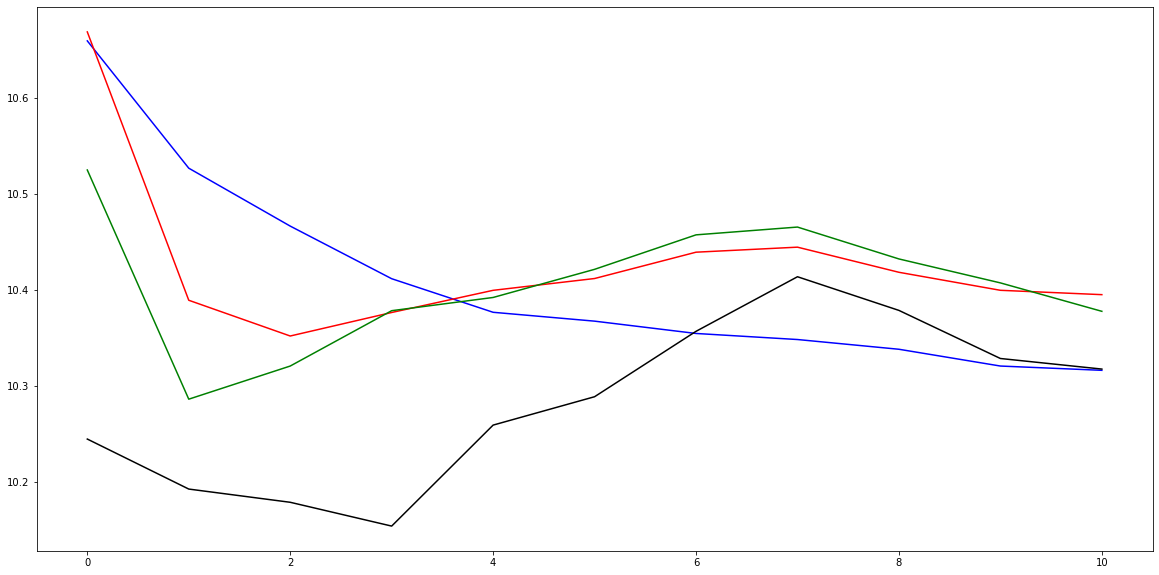

In [34]:
portfolio_size = 200
plt.figure(figsize = (20, 10))


plt.plot([np.mean((np.reshape(thing2[j], (-1, 750)))[:,:]) for j in range(11)], "b")
plt.plot([np.mean((np.reshape(thing2[j], (-1, 750)))[:,:200]) for j in range(11)], "r")
plt.plot([np.mean((np.reshape(thing2[j], (-1, 750)))[:,:100]) for j in range(11)], "g")
plt.plot([np.mean((np.reshape(thing2[j], (-1, 750)))[:,:20]) for j in range(11)], "black")

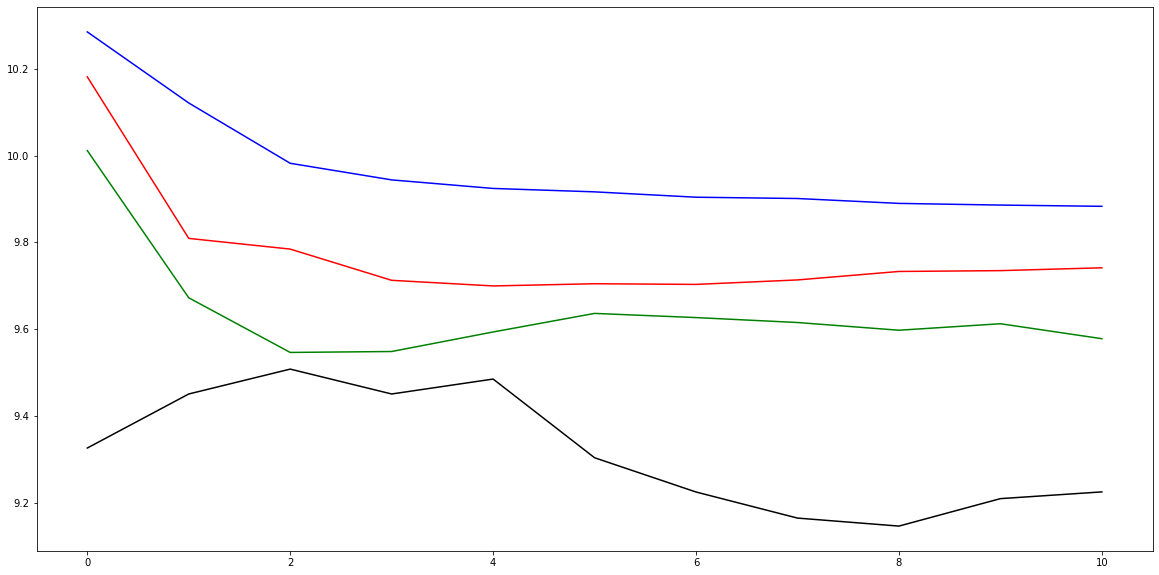

In [44]:
portfolio_size = 200
plt.figure(figsize = (20, 10))


plt.plot([np.mean((np.reshape(thing2[j], (-1, 750)))[:,:]) for j in range(11)], "b")
plt.plot([np.mean((np.reshape(thing2[j], (-1, 750)))[:,:200]) for j in range(11)], "r")
plt.plot([np.mean((np.reshape(thing2[j], (-1, 750)))[:,:100]) for j in range(11)], "g")
plt.plot([np.mean((np.reshape(thing2[j], (-1, 750)))[:,:20]) for j in range(11)], "black")

In [ ]:
portfolio_size = 200
plt.figure(figsize = (20, 10))


plt.plot([np.mean((np.reshape(thing2[j], (-1, 750)))[:,:]) for j in range(8)], "b")
plt.plot([np.mean((np.reshape(thing2[j], (-1, 750)))[:,:200]) for j in range(8)], "r")
plt.plot([np.mean((np.reshape(thing2[j], (-1, 750)))[:,:100]) for j in range(8)], "g")
plt.plot([np.mean((np.reshape(thing2[j], (-1, 750)))[:,:20]) for j in range(8)], "black")

In [43]:
[(((np.reshape(thing2[j], (-1, 750)))[:,:]) == 0).sum() / (200 * 750) * 100 for j in range(11)]

[17.432666666666666,
 17.154,
 16.798,
 16.580000000000002,
 16.343333333333334,
 16.084666666666667,
 15.902666666666669,
 15.699333333333335,
 15.571333333333333,
 15.462666666666665,
 15.353333333333333]

In [40]:
np.shape(((np.reshape(thing2[j], (-1, 750)))[:,:]) == 0)

(200, 750)

In [ ]:
[((np.reshape(thing2[j], (-1, 750)))[:,:]) for j in range(11)]

In [16]:
percent_0s = [(thing2[i] == 0).sum() / len(thing2[i]) * 100 for i in range(11)]

In [ ]:
plt.figure(figsize = (20, 10))
plt.plot([(((np.reshape(thing2[j], (-1, 750)))[:,:]) == 0).sum() / (200 * 750) * 100 for j in range(11)], "b")
plt.plot([(((np.reshape(thing2[j], (-1, 750)))[:,:200]) == 0).sum() / (200 * 200) * 100 for j in range(11)], "r")
plt.plot([(((np.reshape(thing2[j], (-1, 750)))[:,:100]) == 0).sum() / (200 * 100) * 100 for j in range(11)], "g")
plt.plot([(((np.reshape(thing2[j], (-1, 750)))[:,:20]) == 0).sum() / (200 * 20) * 100 for j in range(11)], "black")


In [ ]:
plt.figure(figsize = (20, 10))
plt.plot([(((np.reshape(thing2[j], (-1, 750)))[:,:]) == 0).sum() / (200 * 750) * 100 for j in range(11)], "b")
plt.plot([(((np.reshape(thing2[j], (-1, 750)))[:,:200]) == 0).sum() / (200 * 200) * 100 for j in range(11)], "r")
plt.plot([(((np.reshape(thing2[j], (-1, 750)))[:,:100]) == 0).sum() / (200 * 100) * 100 for j in range(11)], "g")
plt.plot([(((np.reshape(thing2[j], (-1, 750)))[:,:20]) == 0).sum() / (200 * 20) * 100 for j in range(11)], "black")

In [50]:
thing3 = []
for i in range(8):
    thing3.append(np.array([]))

for i in range(7):
    for j in range(10):

        
        for k in range(8):
            
            thing3[k] = np.append(thing3[k], features3.loc[results_binary[0][i][j][2][k].index, "return_40"].values)

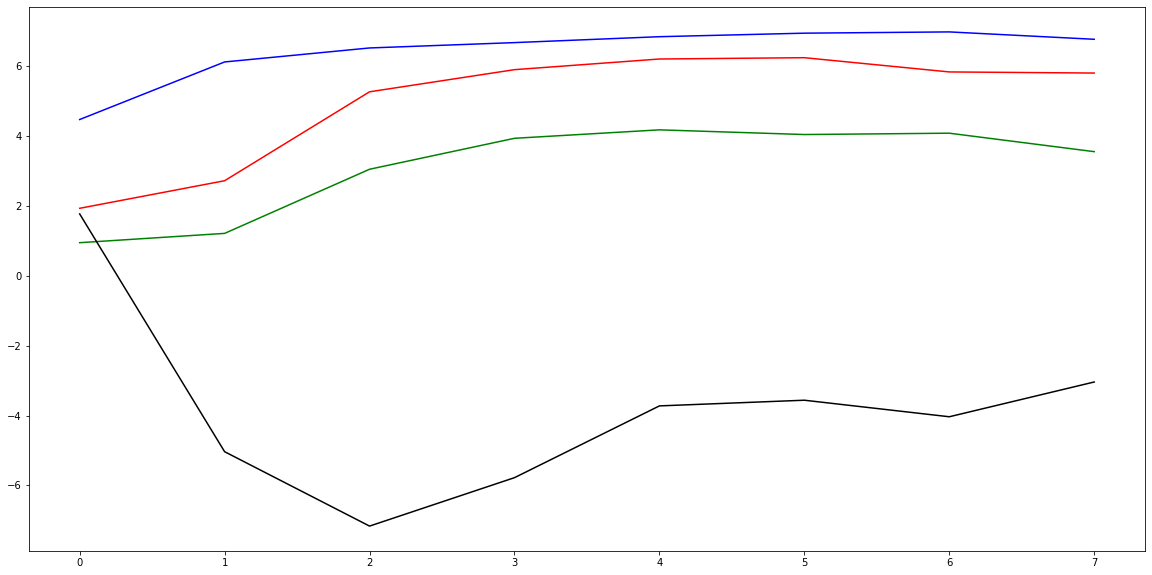

In [51]:
plt.figure(figsize = (20, 10))
plt.plot([np.mean((np.reshape(thing3[j], (-1, 750)))[:,:]) for j in range(8)], "b")
plt.plot([np.mean((np.reshape(thing3[j], (-1, 750)))[:,:200]) for j in range(8)], "r")
plt.plot([np.mean((np.reshape(thing3[j], (-1, 750)))[:,:100]) for j in range(8)], "g")
plt.plot([np.mean((np.reshape(thing3[j], (-1, 750)))[:,:20]) for j in range(8)], "black")

In [48]:
k

0

In [52]:
thing4 = []
for i in range(7):
    thing4.append(np.array([]))

for i in range(7):
    for j in range(10):

        
        for k in range(8):
            
            thing4[i] = np.append(thing4[i], features3.loc[results_binary[0][i][j][2][k].index, "return_40"].values)

In [51]:
len(thing4[0]) / 750

110.0

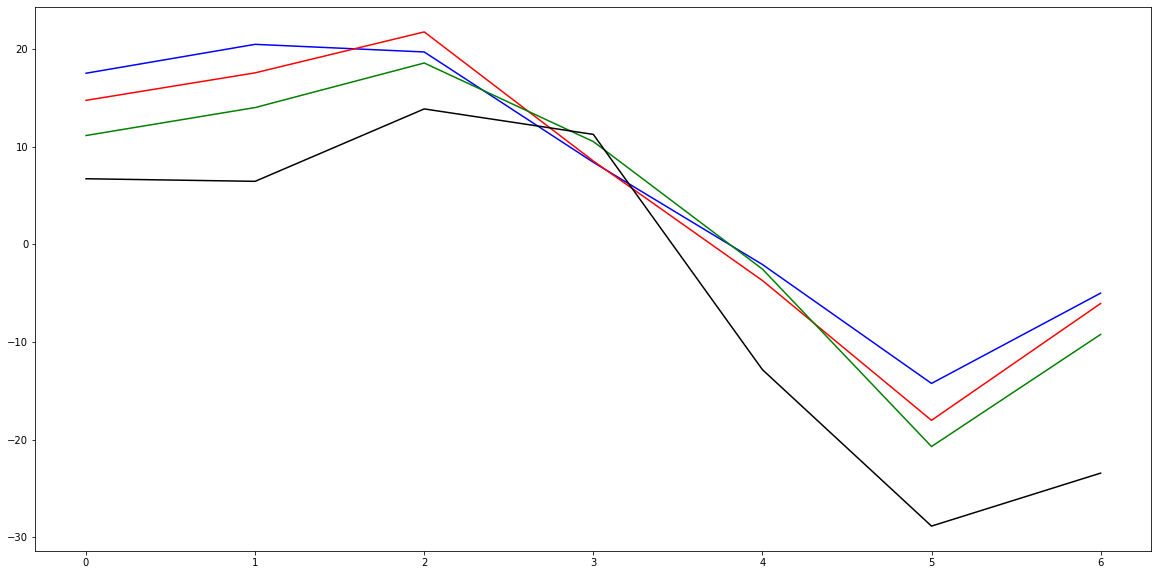

In [54]:
plt.figure(figsize = (20, 10))
plt.plot([np.mean((np.reshape(thing4[j], (-1, 750)))[:,:]) for j in range(7)], "b")
plt.plot([np.mean((np.reshape(thing4[j], (-1, 750)))[:,:200]) for j in range(7)], "r")
plt.plot([np.mean((np.reshape(thing4[j], (-1, 750)))[:,:100]) for j in range(7)], "g")
plt.plot([np.mean((np.reshape(thing4[j], (-1, 750)))[:,:20]) for j in range(7)], "black")


In [ ]:
plt.figure(figsize = (20, 10))
plt.plot([np.mean((np.reshape(thing4[j], (-1, 750)))[:,:]) for j in range(38)], "b")
plt.plot([np.mean((np.reshape(thing4[j], (-1, 750)))[:,:200]) for j in range(38)], "r")
plt.plot([np.mean((np.reshape(thing4[j], (-1, 750)))[:,:100]) for j in range(38)], "g")
plt.plot([np.mean((np.reshape(thing4[j], (-1, 750)))[:,:20]) for j in range(38)], "black")

In [53]:
results_binary[0][10][9][2][6]

Date        Ticker
2016-07-01  MRTX      -6.630824
2016-06-24  MRTX      -9.364548
2016-06-27  MRTX      -1.621622
2016-06-23  MRTX     -20.743034
2016-06-22  MRTX     -17.295597
                        ...    
2016-06-06  TTPH     -10.491071
2016-07-01  REED      27.450980
2016-06-14  ZGNX       2.693603
2016-06-07  TTPH      -6.192661
2016-06-20  SMSI     -17.808219
Name: return_40, Length: 750, dtype: float64

In [55]:
df = pd.DataFrame()

#for i in range(20):
    
for i in range(7):

    for j in range(10):

            
            
        df = df.append(features3.loc[results_binary[0][i][j][2][2][:500].index])
        


In [56]:
len(df)

35000

In [57]:
df = df.drop_duplicates(keep = "first")

In [58]:
len(df)

13799

In [59]:
dates_df = df.reset_index().set_index(["Date"]).index

In [60]:
dates_df = np.unique(dates_df)

In [61]:
dates_df = np.sort(dates_df)

In [63]:
Dates[650]

'2014-04-28'

In [64]:
df = df.reset_index().set_index(["Date"]).loc[dates_df].reset_index().set_index(["Date", "Ticker"])

In [65]:
df.to_pickle("CreatingSecondDataset/train_df_4")

In [66]:
df

Close  ABAND_indicator_10  ABAND_indicator_20  \
Date       Ticker                                                   
2013-10-18 FB       54.22            0.484652            0.550506   
           CTIC     18.30            0.000211            0.137419   
           JCP       7.00           -0.395402           -0.629436   
           RIOT     15.68            0.156463            0.033211   
           ALNY     59.75            0.027169           -0.129353   
...                   ...                 ...                 ...   
2014-04-28 ANIK     39.69           -0.010362           -0.030540   
           ABIO    199.08           -0.099154           -0.306025   
           CTIC     30.20           -0.103832           -0.244884   
           ADXS     38.25           -0.175173           -0.456156   
           JAKK     89.10            0.058093            0.435682   

                   ABAND_indicator_40  ABAND_signal_10  ABAND_signal_20  \
Date       Ticker                                                         
2013-10-18 FB                1.039703              1.0              1.0   
           CTIC              0.736472              0.0              0.0   
           JCP              -1.514585              0.0             -1.0   
           RIOT              0.319196              0.0              0.0   
           ALNY              0.125483              0.0              0.0   
...                               ...              ...              ...   
2014-04-28 ANIK             -0.123010              0.0              0.0   
           ABIO             -0.498544              0.0              0.0   
           CTIC             -0.480647              0.0              0.0   
           ADXS             -1.118971              0.0             -1.0   
           JAKK              0.852571              0.0              1.0   

                   ABAND_signal_40  MFV_40_10_indicator_sign_change  \
Date       Ticker                                                     
2013-10-18 FB                  1.0                              0.0   
           CTIC                1.0                              0.0   
           JCP                -1.0                              0.0   
           RIOT                0.0                              0.0   
           ALNY                0.0                              0.0   
...                            ...                              ...   
2014-04-28 ANIK                0.0                              0.0   
           ABIO               -1.0                              0.0   
           CTIC               -1.0                              0.0   
           ADXS               -1.0                              0.0   
           JAKK                1.0                              0.0   

                   APO_10_20  APO_10_40  ...  return_40  Class_multi_40_20  \
Date       Ticker                        ...                                 
2013-10-18 FB       0.028345   0.095207  ...  -0.756179               11.0   
           CTIC     0.054526   0.164538  ...  -5.464481               14.0   
           JCP     -0.115650  -0.254717  ...  21.142857                1.0   
           RIOT     0.013740   0.061664  ...  -6.122449               15.0   
           ALNY     0.004384   0.046746  ...   1.958159                9.0   
...                      ...        ...  ...        ...                ...   
2014-04-28 ANIK    -0.000141   0.010089  ...  17.535903                2.0   
           ABIO    -0.038071  -0.074612  ...  -8.860759               18.0   
           CTIC    -0.029940  -0.055078  ...  -4.635762               16.0   
           ADXS    -0.088355  -0.214856  ...  28.627451                0.0   
           JAKK     0.048051   0.118402  ... -10.774411               18.0   

                   Class_binary_20_20  return_20  Class_binary_10_20  \
Date       Ticker                                                      
2013-10-18 FB                     1.0  -9.609000               

In [ ]:
"""
goes from 5500 to 915
unqiue tickers are 96

for 500 unique tickers are 76

"""

In [134]:
np.sum(thing[0] == 0)

17918

In [135]:
np.mean(thing[0])

10.78813

In [63]:
df["Class_multi_40_20"]

Date        Ticker
2014-05-23  OPTT      19.0
2014-05-27  OPTT      19.0
2014-05-16  ISR        1.0
2014-05-01  CTIC      16.0
2014-05-15  ISR        1.0
                      ... 
2021-06-14  LPTH      18.0
2021-06-23  LPTH      18.0
2021-06-18  APVO      19.0
2021-06-09  LPTH      19.0
2021-06-22  SINT      16.0
Name: Class_multi_40_20, Length: 45781, dtype: float64

(array([7074., 3117., 1873., 1567., 1269., 1182., 1061.,  971.,  965.,
         989., 1059., 1153., 1155., 1305., 1502., 1776., 2248., 3034.,
        4443., 8038.]),
 array([ 0.  ,  0.95,  1.9 ,  2.85,  3.8 ,  4.75,  5.7 ,  6.65,  7.6 ,
         8.55,  9.5 , 10.45, 11.4 , 12.35, 13.3 , 14.25, 15.2 , 16.15,
        17.1 , 18.05, 19.  ]),
 <BarContainer object of 20 artists>)

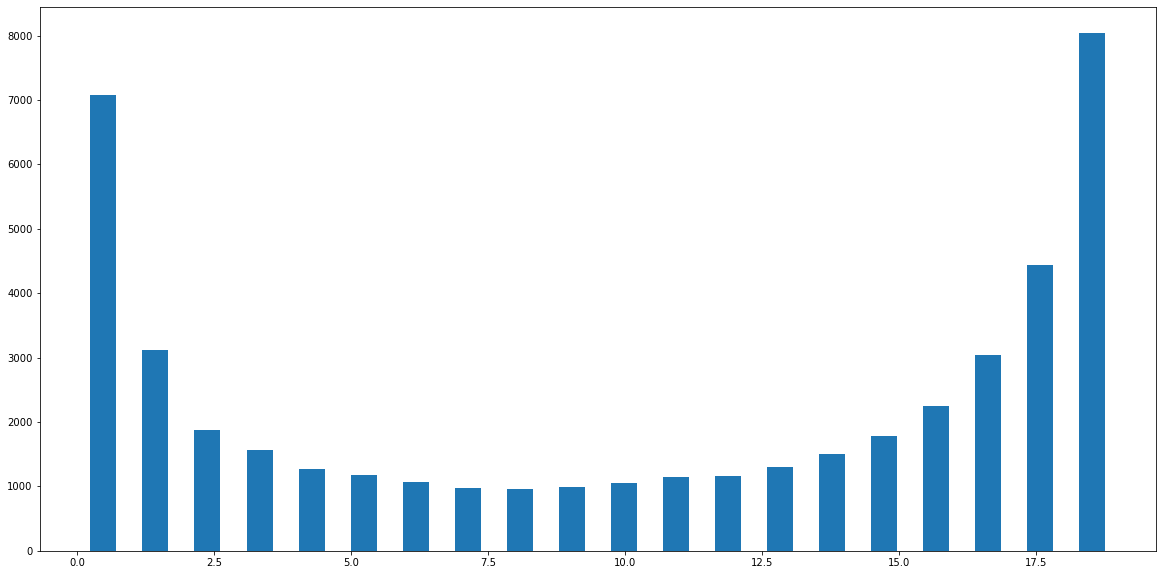

In [64]:
plt.figure(figsize = (20, 10))
plt.hist(df["Class_multi_40_20"], rwidth = 0.5, bins = 20)

(array([14210.,  6146.,  4224.,  3180.,  2618.,  2353.,  2143.,  1997.,
         1994.,  1933.,  1963.,  2052.,  2182.,  2500.,  2841.,  3360.,
         4211.,  5551.,  8039., 14902.]),
 array([ 0.  ,  0.95,  1.9 ,  2.85,  3.8 ,  4.75,  5.7 ,  6.65,  7.6 ,
         8.55,  9.5 , 10.45, 11.4 , 12.35, 13.3 , 14.25, 15.2 , 16.15,
        17.1 , 18.05, 19.  ]),
 <BarContainer object of 20 artists>)

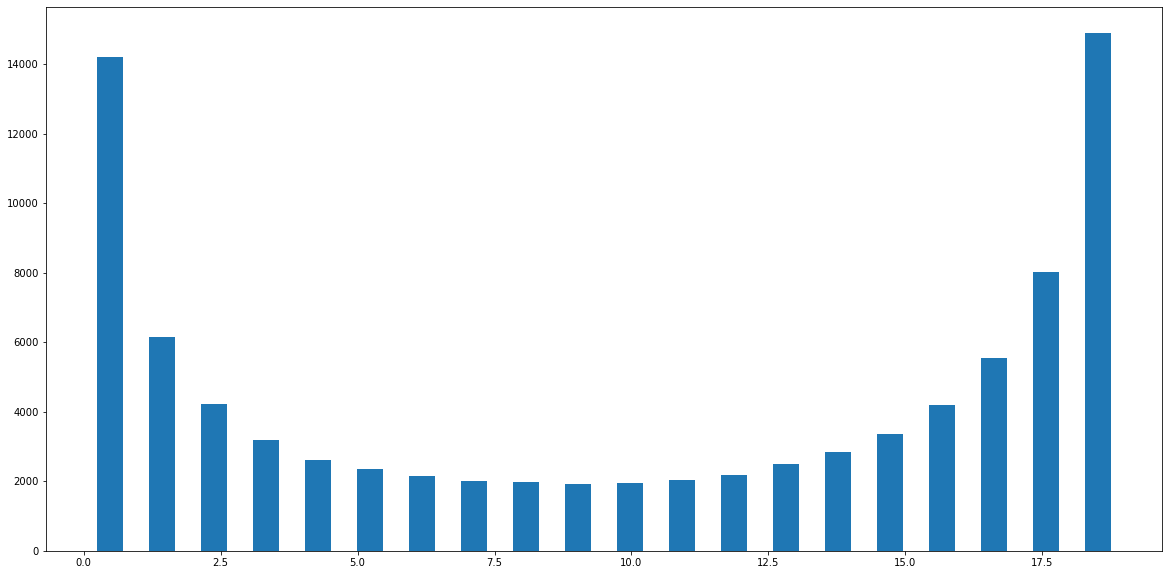

In [66]:
plt.figure(figsize = (20, 10))
plt.hist(df["Class_multi_40_20"], rwidth = 0.5, bins = 20)